# Исследование объявлений о продаже квартир

***Описание проекта:*** 

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно определять рыночную стоимость объектов недвижимости.

Задача — установить параметры от которых зависит стоимость, что возволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

***Описание данных:*** 

- `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
- `balcony` — число балконов
- `ceiling_height` — высота потолков (м)
- `cityCenters_nearest` — расстояние до центра города (м)
- `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
- `first_day_exposition` — дата публикации
- `floor` — этаж
- `floors_total` — всего этажей в доме
- `is_apartment` — апартаменты (булев тип)
- `kitchen_area` — площадь кухни в квадратных метрах (м²)
- `last_price` — цена на момент снятия с публикации
- `living_area` — жилая площадь в квадратных метрах (м²)
- `locality_name` — название населённого пункта
- `open_plan` — свободная планировка (булев тип)
- `parks_around3000` — число парков в радиусе 3 км
- `parks_nearest` — расстояние до ближайшего парка (м)
- `ponds_around3000` — число водоёмов в радиусе 3 км
- `ponds_nearest` — расстояние до ближайшего водоёма (м)
- `rooms` — число комнат
- `studio` — квартира-студия (булев тип)
- `total_area` — общая площадь квартиры в квадратных метрах (м²)
- `total_images` — число фотографий квартиры в объявлении

***План работы над проектом:***

1. Знакомство с данными;
2. Предобработка данных;
3. Добавление новых столбцов в таблицу;
4. Исследование данных; 
5. Общий вывод.

## Знакомство с данными

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

# warnings.filterwarnings("ignore")
sns.set(rc={'figure.figsize': (10,7)})

pd.set_option('display.max_columns', None)

In [2]:
def start(df):
        df.info()
        print('\n',df.describe())
        display(df.sample(5))
        print('Количество пропусков в таблице:', df.isna().sum().sum(), '\n')
        print(df.isna().sum(), '\n')
        print('Количество дубликатов в таблице:',  df.duplicated().sum())
        df.hist(figsize=(15, 20));

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
22226,9,5200000.0,58.7,2018-07-13T00:00:00,3,2.5,5.0,37.0,2,NaN,False,False,6.9,NaN,Санкт-Петербург,32897.0,9974.0,2.0,407.0,0.0,NaN,60.0
23510,11,3300000.0,41.3,2017-10-24T00:00:00,1,2.8,20.0,17.5,15,NaN,False,False,9.5,1.0,деревня Новое Девяткино,NaN,NaN,NaN,NaN,NaN,NaN,202.0
15415,11,3800000.0,43.0,2018-03-29T00:00:00,2,2.5,5.0,28.0,1,NaN,False,False,5.0,NaN,Пушкин,14994.0,27147.0,0.0,NaN,0.0,NaN,143.0
3058,1,8160000.0,83.2,2019-04-22T00:00:00,3,NaN,18.0,45.4,4,NaN,False,False,15.6,NaN,Санкт-Петербург,44222.0,9850.0,0.0,NaN,0.0,NaN,NaN
3108,18,4200000.0,45.0,2018-10-17T00:00:00,2,2.5,9.0,28.0,2,NaN,False,False,8.0,NaN,Санкт-Петербург,21807.0,15025.0,0.0,NaN,1.0,139.0,105.0


Количество пропусков в таблице: 101441 

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64 

Количество дубликатов в таблице: 0


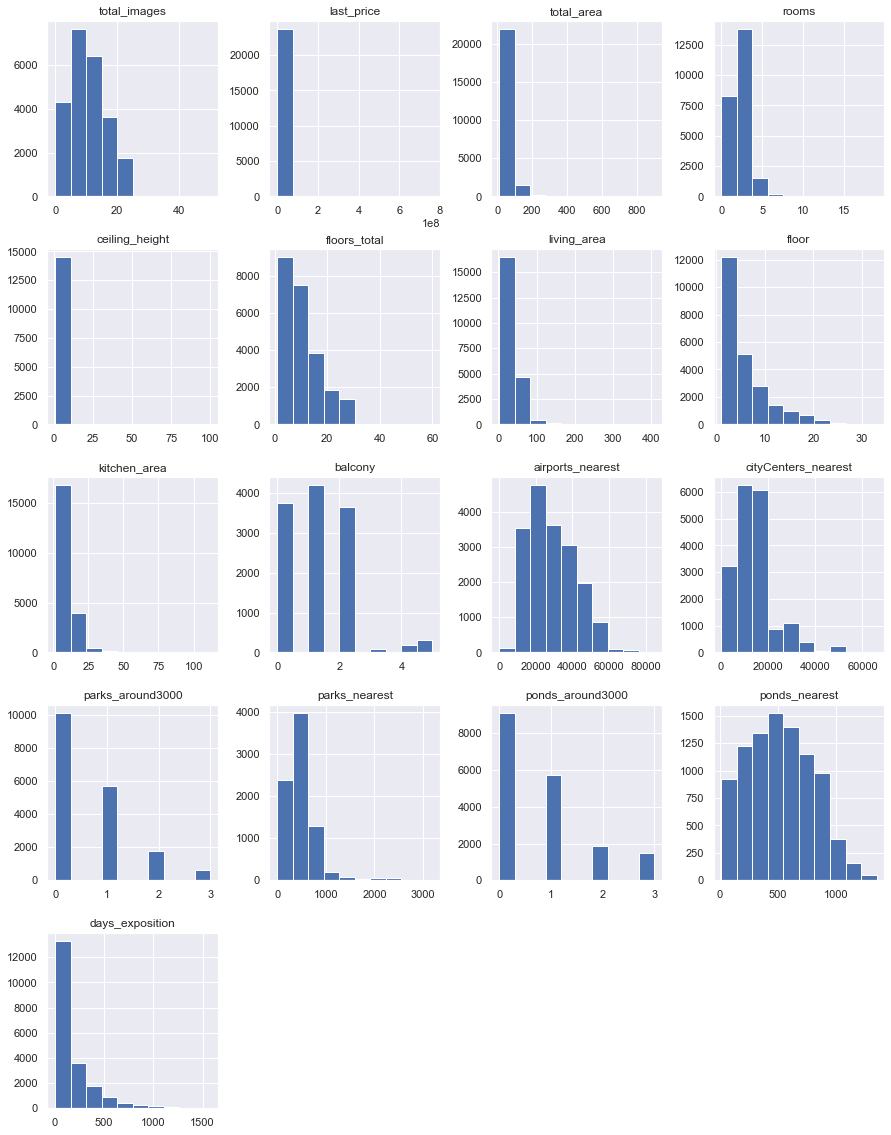

In [3]:
data = pd.read_csv('real_estate_data.csv', sep='\t')
start(data)

**Вывод:** В таблице `22` столбца c различными параметрами квартир. Из описания к данным и свойства таблицы мы сразу выявили некоторые несоответствия, такие как типы некоторых столбцов. Мы поменяем их тип в стадии предобработки данных. Так же приведём  название некоторых столбцов к общему виду. Самое неприятное, что в таблице есть много разных пропусков. Больше всего выделяются данные, которые были получены автоматически на основе картографических данных. Возможно это проблема при выгрузке. По возможности нужно поговорить со специалистом, который занимался этой задачей.

Что касается аналитики по графикам, мы видим, что есть аномальные значения по столбцу `days_exposition, rooms и balcony`. В целом по проекту будем рассматривать каждый столбец подробно.

##  Предобработка данных

Сперва привёдём к общему виду названия столбцов.

In [4]:
data.columns = [re.sub(r'(?<=[a-z])(?=[A-Z0-9])|(?<=[A-Z0-9])(?=[A-Z][a-z\d])', '_', col).lower()
                for col in data.columns]
data.head(3)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.7,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0


Отлично! В предоставленном нам массиве данных мы имеем `14` столбцов с пропусками значений и наличием дубликатов. По возможности будем заполнять значения. Первый столбец `total_images`. Исследуем его.

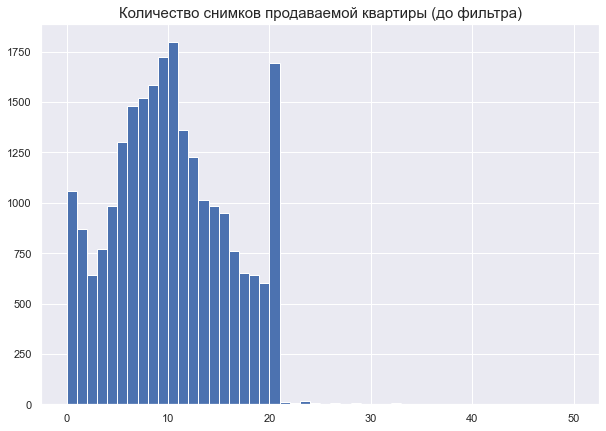

In [5]:
data.hist('total_images', bins=50);
plt.title('Количество снимков продаваемой квартиры (до фильтра)', fontsize = 15);

Видим, что в основном пользователи загружают около `10` фото в объявлении. Очень выбивается всплеск в районе `20 фото`. Мы не будем удалять сроки содержащие это значение, так как это значительное количество пользователей таблицы и удаление может повлиять на общий результат. Возможно кто-то очень любит свою квартиру и готов к более подробной съёмке, но скорее всего были загружены дубликаты, `2 раза по 10`. Поправим ситуацию, уравняв эти фото к `10`. Всё что больше `20` мы уберём из таблицы. Так  же приведём данные столбца в целоцисленный тип.  

Что касается всплеска на `0` уровне, это мы никак править не будем. Возможно пользователь осознанно не стал добавлять фото, а сделать акцент на описании и в целом обладает большим количеством свободного времени показывать ещё всем желающим.

dtype('int32')

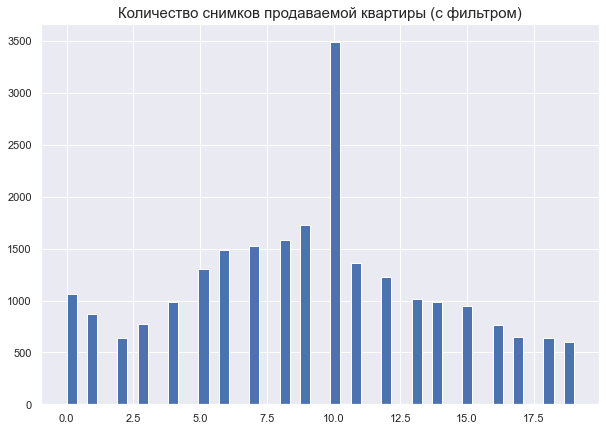

In [6]:
# удаляем из таблицы выдающиеся значения
data = data.loc[(data['total_images'] <= 20)]

# уравниваем к пику 10
data.loc[(data['total_images'] == 20), 'total_images'] = data['total_images'] / 2

# привеодим к типу int 
data['total_images'] = data['total_images'].astype('int')

# проверка
data.hist('total_images', bins=50);
plt.title('Количество снимков продаваемой квартиры (с фильтром)', fontsize = 15);

data['total_images'].dtype

Хорошо, следующий стобец рассмотрим `last_price` (цена на момент снятия с публикации).

In [7]:
data['last_price'].sort_values()

8793         12190.0
14911       430000.0
17456       430000.0
16274       440000.0
16219       450000.0
            ...     
15651    300000000.0
1436     330000000.0
14706    401300000.0
19540    420000000.0
12971    763000000.0
Name: last_price, Length: 23624, dtype: float64

В целом по ценам всё впорядке - разная цена за разное "качество" квартиры, за исключением `8793` строки в таблице со значением `12190.0` за жильё. Просто удалим эту строку, так как слишком маленько значение. И даже если ошиблись с одним нулём, то всё равно критически маленькое.

In [8]:
data = data.loc[(data['last_price'] != 12190.0)]

Тут же сменим тип с `float64` у столбца на целочисленный `int32`.

In [9]:
data['last_price'] = data['last_price'].astype('int')  
data['last_price'].dtypes

dtype('int32')

Следующий стоблец `total_area` (общая площадь квартиры в квадратных метрах (м²)

In [10]:
data['total_area'].sort_values()

19904     12.0
19546     13.0
19807     13.0
17961     13.0
19558     13.2
         ...  
5358     590.0
15651    618.0
3117     631.0
12859    631.2
19540    900.0
Name: total_area, Length: 23623, dtype: float64

Первый столбец, где всё впорядке. Нет пропусков и значения в педелах нормы. Поиск Яндекса выдаёт квартыры размером `13 квадратов`, поэтому переходим к стоблцу `first_day_exposition` (дата публикации).

In [11]:
data['first_day_exposition']

0        2019-03-07T00:00:00
1        2018-12-04T00:00:00
2        2015-08-20T00:00:00
3        2015-07-24T00:00:00
4        2018-06-19T00:00:00
                ...         
23694    2017-03-21T00:00:00
23695    2018-01-15T00:00:00
23696    2018-02-11T00:00:00
23697    2017-03-28T00:00:00
23698    2017-07-21T00:00:00
Name: first_day_exposition, Length: 23623, dtype: object

Это стоблец с датами записан типом `object`, поэтому есть смысл отформатировать его, оставив только дату, а время из записи удалить, так как оно везда равно `00:00:00`. И заодно сменим тип столбца.

In [12]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

# проверка
data['first_day_exposition'].head()

0   2019-03-07
1   2018-12-04
2   2015-08-20
3   2015-07-24
4   2018-06-19
Name: first_day_exposition, dtype: datetime64[ns]

С датой публикации разобрались. Тепрь столбец `ceiling_height` (высота потолков (м)). Постороим 2 графика. В первом возьмём значения высоты, которая превышает `4 метра`, а во втором возьмём за основу минимальный стантадрт в `2.40 метра`. Ищем аномальные значения.

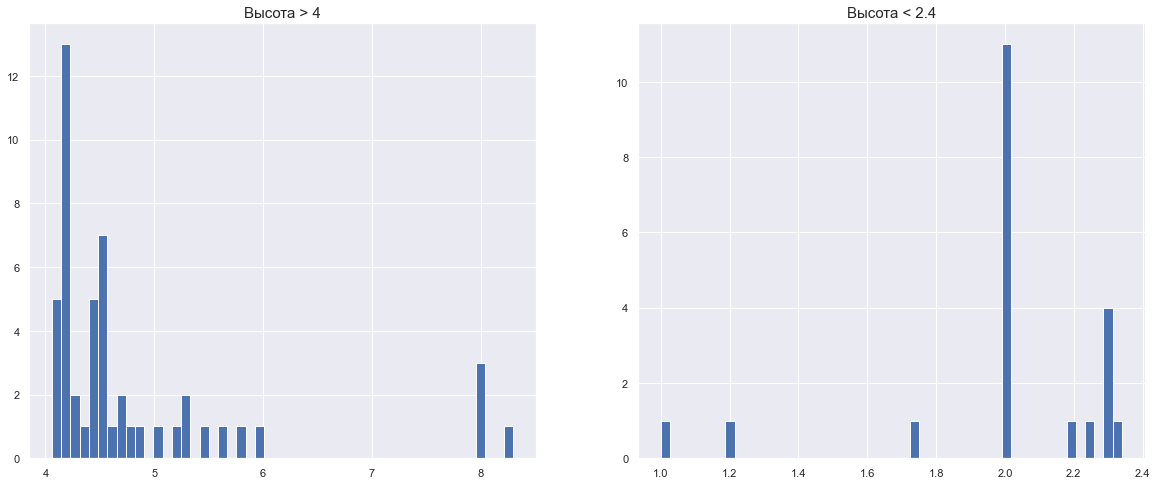

In [13]:
var1 = data.query('ceiling_height > 4 and ceiling_height < 10')['ceiling_height']
var2 = data.query('ceiling_height < 2.4')['ceiling_height']

fig, ax = plt.subplots(1, 2, figsize=(20, 8))

ax[0].hist(var1, bins=50)
ax[0].set_title('Высота > 4', fontsize = 15)

ax[1].hist(var2, bins=50)
ax[1].set_title('Высота < 2.4', fontsize = 15)

plt.show()

По графиками видим, что есть аномальные значения высоты потолков как в первом так и во втором. На первом пик приходися на высоте около `4.2 - 4.5 метров` - более `40 квартир`. Их мы оставим, а остальные (есть значения вплоть `до 100 метров`) попробуем привести к общему виду, разделив значение на `10`. Возможно при заполнении объявления, пользователь например забыл поставить запятую в числе и вместо `2.5 метров` высоты мы получили `25 метров`. Все значение, что есть и получатся в результате нашего деления, которые будут меньше стандарта в `2.4 метра`, мы удалим из таблицы.

In [14]:
# приводим к общему виду большие числа
data.loc[(data['ceiling_height'] > 4.5), 'ceiling_height'] = data['ceiling_height'] / 10

# удалляем из таблицы минимальные значения
data = data.loc[(data['ceiling_height'] >= 2.40) &
                (data['ceiling_height'] <= 4.5) |
                (data['ceiling_height'].isna())]

# проверка на успех
print('Самая низкая высота потолка в таблице', data['ceiling_height'].min())
print('Самая высокая высота потолка в таблице', data['ceiling_height'].max())

Самая низкая высота потолка в таблице 2.4
Самая высокая высота потолка в таблице 4.5


С высотой потолков разобрались. НО! У нас есть в этом столбце пропуски. И их при знакомстве с данными выдало аж `9195`. Заменим пустые значения медианным по столбцу.

In [15]:
data.loc[data['ceiling_height'].isna(), 'ceiling_height'] = data['ceiling_height'].median()

# проверка
data['ceiling_height'].isna().sum()

0

Отлично! Перейдём к стобцу `floors_total` (всего этажей в доме).

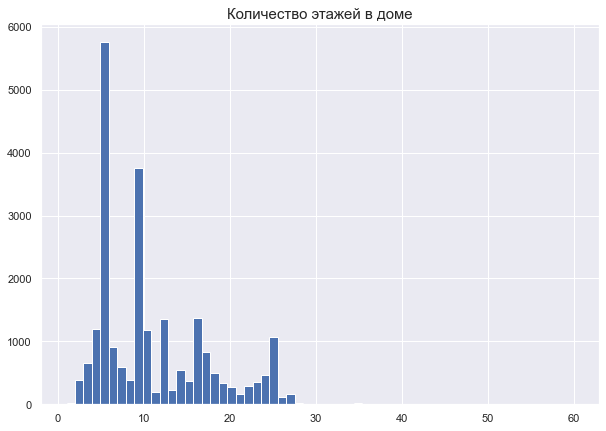

In [16]:
data.hist('floors_total', bins=60);
plt.title('Количество этажей в доме', fontsize = 15);

По графику видим, что он достаточно правильной формы, но в тоже время показывает, что в таблице есть дома высотой выше `36 этажей` причем с жильём на продажу. Это скорее всего ошибка. Через поиск в интернете в Петербурге удалось найти только `36 этажное здание` с жилыми помещениями. Будем отталкиваться от этого и удалим всё заначения выше.

Так же в этом столбце мы не можем заменить пропуски значениями. Так как дом может иметь любое количество этажей, несмотря на любые характеристики квартиры. Расчет средней или медианы по всем домам не дадут нам объективного результата. Поэтому удилим сроки из таблицы посмотрев их количество на данный момент.

In [17]:
data['floors_total'].isna().sum()

86

In [18]:
data = data.loc[(data['floors_total'] <= 36)]

# проверка
print(data[data['floors_total'] > 36])

Empty DataFrame
Columns: [total_images, last_price, total_area, first_day_exposition, rooms, ceiling_height, floors_total, living_area, floor, is_apartment, studio, open_plan, kitchen_area, balcony, locality_name, airports_nearest, city_centers_nearest, parks_around_3000, parks_nearest, ponds_around_3000, ponds_nearest, days_exposition]
Index: []


Так же мы изменим тип стоблца на целочисленный. Так как количестов этажей не может быть дробным значением.

In [19]:
data['floors_total'] = data['floors_total'].astype('int')
data['floors_total'].dtypes

dtype('int32')

Переходим с столбцу `living_area` (жилая площадь в квадратных метрах (м²).

In [20]:
data[data['living_area'].notnull()].sort_values('living_area')['living_area']

21758      2.0
13915      2.0
3242       3.0
23574      3.0
17582      5.0
         ...  
660      312.5
12859    322.3
4237     332.0
5358     409.0
19540    409.7
Name: living_area, Length: 21628, dtype: float64

К максимальным значения нет вопросов. Вполне существующие жилые пространства. А вот `2 квадрата` это очень мало! Построим график и помострим сколько крайне малых значений по жилой площади есть в таблице. Будем разглядывать квартиры менее `10 жилых квадратов`.

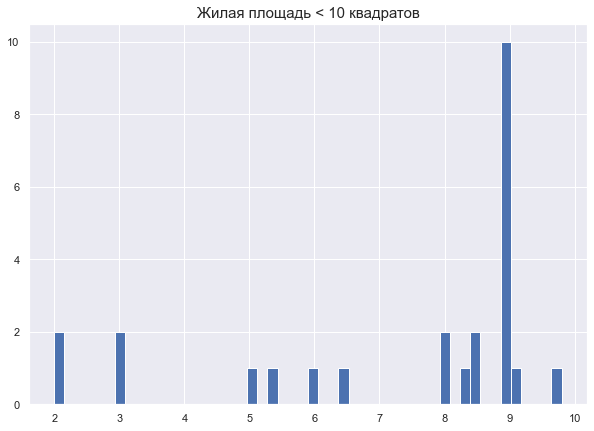

In [21]:
data.query('living_area < 10').hist('living_area', bins=50);
plt.title('Жилая площадь < 10 квадратов', fontsize = 15);

Наблюдаем пик на значении `9`. Возьмём его за минимально домустимое. Всё что ниже уберём из таблицы.

In [22]:
data = data.loc[(data['living_area'] >= 9) | (data['living_area'].isna())]

#проверка
print(data[data['living_area'] < 9])

Empty DataFrame
Columns: [total_images, last_price, total_area, first_day_exposition, rooms, ceiling_height, floors_total, living_area, floor, is_apartment, studio, open_plan, kitchen_area, balcony, locality_name, airports_nearest, city_centers_nearest, parks_around_3000, parks_nearest, ponds_around_3000, ponds_nearest, days_exposition]
Index: []


Теперь мы можем перейти к пустым значение столбца. Заполним их. Будем брать за основу количество комнат в квартире по столбцу `rooms`.

In [23]:
print(data['rooms'].sort_values())

1277      0
10416     0
19477     0
7237      0
7008      0
         ..
20829    14
866      14
5358     15
18848    16
14498    19
Name: rooms, Length: 23478, dtype: int64


Разберёмся для начала с огромным количеством комнат. Построим график, взяв значения больше `5 комнат`.


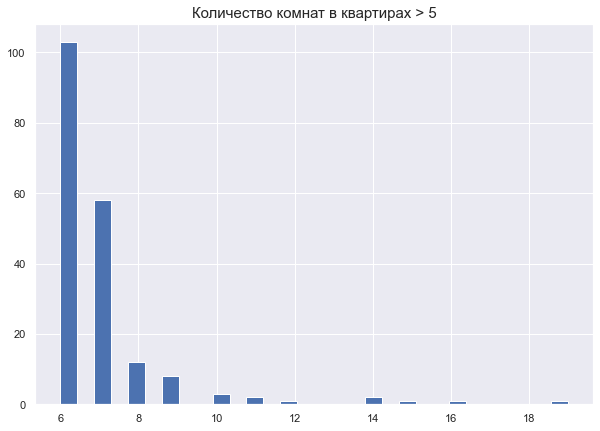

In [24]:
data.query('rooms > 5').hist('rooms', bins=30);
plt.title('Количество комнат в квартирах > 5', fontsize = 15);

График показывает нам, что в таблице есть около `100 квартир` с `6 комнатами` и около `60 квартир` с `7 комнатами`. Возможно это то жильё, что имеет жилую площадь более `300 квадратных метров`. Оставим эти два пика как показано в графике, а все остальные варианты мы уберём из таблицы.

In [25]:
data = data.loc[data['rooms'] <= 7]

# проверка
print(data[data['rooms'] > 7])

Empty DataFrame
Columns: [total_images, last_price, total_area, first_day_exposition, rooms, ceiling_height, floors_total, living_area, floor, is_apartment, studio, open_plan, kitchen_area, balcony, locality_name, airports_nearest, city_centers_nearest, parks_around_3000, parks_nearest, ponds_around_3000, ponds_nearest, days_exposition]
Index: []


Теперь займёмся отсутсвием комнат. Такое может быть если жильё это студия. По своей сути такой тип жилья `не имеет комнат`. Посчитаем количество студий в таблице и количество комнат равные `0`.

In [26]:
print('Количесво студий:', data[data['studio'] == True].shape[0])
print('Количесво жилья без комнат:', data[data['rooms'] == 0].shape[0])

Количесво студий: 143
Количесво жилья без комнат: 190


Отлично! Проверим у всех ли студий стоит значение `0` в столбце `rooms`.

In [27]:
data[(data['rooms'] != 0) & (data['studio'] == True)].shape[0]

11

`11 студий имеет комнату`. Интересно, но не логично. Заменим значение на `0 комнат`, чтобы избежать искажения данных в дальнейших расчётах. А так же удалим строки квартир без комнат, что не относятся к студиям. Так как при заполнении пустых значений в столбце `living_area` они могут дать искажение для квартир типа - `студия`. Скорее всего пользователь просто забыл заполнить поле с комнатами, что привело к такому результату. Таких квартир около `50 штук` и влияния на всю таблицу будет минимальным, что не скажешь относительно `квартир - студий`. Если их оставить, то получим искажения для этого сегмента.

In [28]:
# заменяем комнаты студии на 0
data.loc[(data['studio'] == True), 'rooms'] = 0

# удаляем все квартиры не студии с 0 значение комнат
data = data.loc[~((data['rooms'] == 0) & (data['studio'] == False))]

# проверка
print('Количесво студий:', data[data['studio'] == True].shape[0])
print('Количесво жилья без комнат:', data[data['rooms'] == 0].shape[0])

Количесво студий: 143
Количесво жилья без комнат: 143


Хорошо. Теперь мы можем заполнить пустые значения в столбце с жилой площадью. Для этого сгруппируем квартиры по количеству комнат и найдём для каждой группы медианное значение. Им и заполним пропуски.

In [29]:
data['living_area'] = data['living_area'].fillna(data.groupby('rooms')['living_area'].transform('median'))

# проверка
data['living_area'].isna().sum()

0

Итого `0 пропусков` в столце `living_area`. Это успех! Теперь столбец `floor` (этаж). В нём нет пропусков, но нужно посмотреть на наличие аномалий.

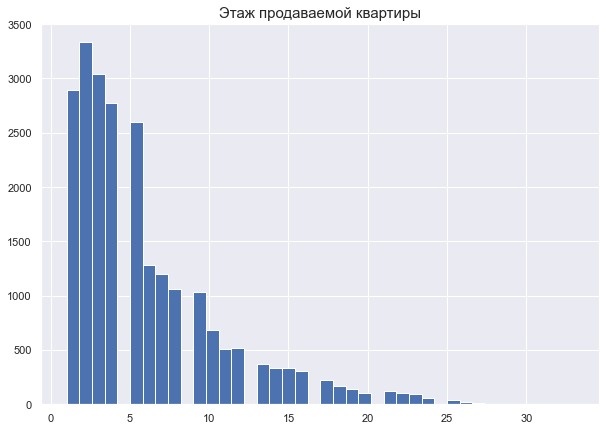

In [30]:
data.hist('floor', bins=40)
plt.title('Этаж продаваемой квартиры', fontsize = 15);

Аномалий не наблюдается. Это хорошо. Мы переходим к `is_apartment` (апартаменты (булев тип)) В этом столбце мы только сменим тип на `bool`. В начале исследования мы выявили пропуски. Их очень много и заменить их не представляется возможным. Возможная проблема их появления это ошибка при выгрузке, так как даже тип стобца имел не подходящий наполнению тип данных. Просто если бы галочка на сайте была не активирована, то по умолчанию было бы занчение `False`, а не пустое значение.

In [31]:
data['is_apartment'] = data['is_apartment'].astype('bool')
data['is_apartment'].dtypes

dtype('bool')

Вот мы и добрались до "вкусненького". Это `kitchen_area` (площадь кухни в квадратных метрах (м²)).

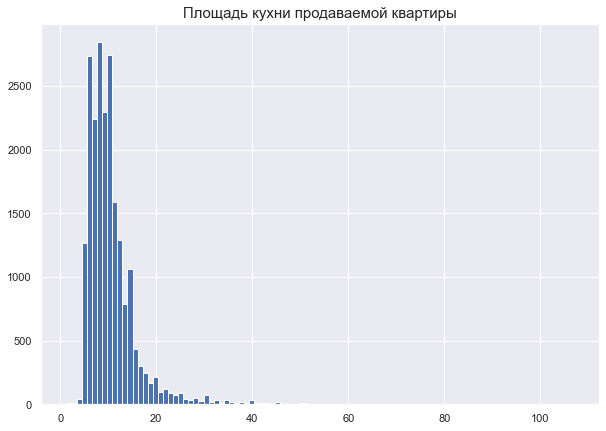

In [32]:
data.hist('kitchen_area', bins=100);
plt.title('Площадь кухни продаваемой квартиры', fontsize = 15);

Разброс очень большой в значениях. Поэтому уберём все, что выше `50 квадратов` и посмотрим внимательно какие значенеи у нас минимальные. Для этого построим график с выборкой кухонь меньше `5 квадратных метров`, ведь именно такое значение нашлось в интернете по запросу минимальные требования к проектированию кухонь современного жилья.

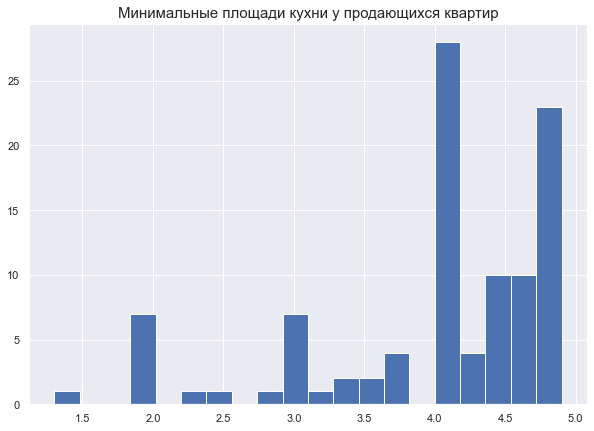

In [33]:
data.query('kitchen_area < 5').hist('kitchen_area', bins=20);
plt.title('Минимальные площади кухни у продающихся квартир', fontsize = 15);

Итого `25 кухонь` размером `4 квадратных метра`. Кому-то не очень повезло, но давайте оставим их, а всё, что меньше мы уберём, так как это похоже на очередую ошибку при заполнинии объявления.

In [34]:
data = data.loc[(data['kitchen_area'] >= 4) & (data['kitchen_area'] <= 50) | (data['kitchen_area'].isna())]

# проверка
data[data['kitchen_area'] < 4].shape[0]

0

Теперь заполним пропуски в столбце. При первом рассмотрении таблицы их было `2278`. Заполнять будем медианым столбца, с группировкой по количеву комнат.

In [35]:
data['kitchen_area'] = data['kitchen_area'].fillna(data.groupby('rooms')['kitchen_area'].transform('median'))

# проверка
data['kitchen_area'].isna().sum()

143

In [36]:
# есть пропуски, посмотрим в таблице
data.query('kitchen_area.isna()').head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
144,1,2450000,27.00,2017-03-30,0,2.65,24,15.50,2,True,True,False,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,181.0
440,8,2480000,27.11,2018-03-12,0,2.65,17,24.75,4,True,True,False,NaN,2.0,Санкт-Петербург,38171.0,15015.0,0.0,NaN,2.0,982.0,64.0
608,2,1850000,25.00,2019-02-20,0,2.65,10,18.00,7,True,True,False,NaN,NaN,посёлок Шушары,NaN,NaN,NaN,NaN,NaN,NaN,29.0
697,12,2500000,24.10,2017-12-01,0,2.75,25,17.50,21,True,True,False,NaN,NaN,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,201.0
716,5,1500000,17.00,2017-06-07,0,2.70,9,12.00,1,True,True,False,NaN,0.0,посёлок Шушары,18654.0,29846.0,0.0,NaN,0.0,NaN,40.0


Заполнили пропуски, но у нас осталось `143 пустых строки`. При детальном рассмотрении мы видим, что это квартиры-студии. Как правило такие квартиры не имеют комнат, как мы высказвались выше и нет кухни как таковой. Поэтому будет правильным не оставлять прокуск в этих данных, а устанвить значение `0`.

In [37]:
data.loc[(data['studio'] == True), 'kitchen_area'] = 0

# проверка
data['kitchen_area'].isna().sum()

0

Теперь посмотрим столбец `open_plan` (свободная планировка (булев тип)).

In [38]:
data.groupby('open_plan')['open_plan'].count()

open_plan
False    23311
True         8
Name: open_plan, dtype: int64

Все значения на месте, тип колонки установлен правильно. Всего `8 квартир` имеет свободную планировку. Расммотри `balcony` (число балконов).

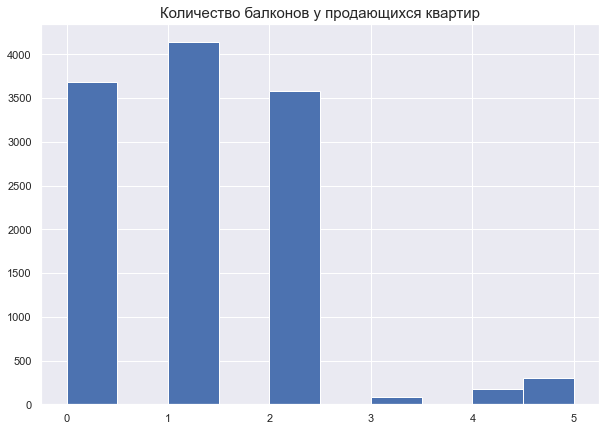

In [39]:
data.hist('balcony', bins=10);
plt.title('Количество балконов у продающихся квартир', fontsize = 15);

Число балконов в пределах нормы. Где есть квартиры с `7 комнатами`, там и `5 балконов` с лёгкостью расплоложатся. Но в этом столбце при начальном рассмотрении таблицы обнаружилось `11519 пропусков`. Это почти половина всей таблицы. Возможно пользователь не хотел указывать количетсво балконов, так их нет вовсе. Поэтому просто заменим пустые значения на `0`.

In [40]:
data.loc[(data['balcony'].isna()), 'balcony'] = 0

# проверка
data['balcony'].isna().sum()

0

Так же сменим тип данных в этом столбце на целочисленный. Все балконы имеют количество отображаемое целым числом.

In [41]:
data['balcony'] = data['balcony'].astype('int')
data.dtypes['balcony']

dtype('int32')

Далее столбец `locality_name` (название населённого пункта). Посчитаем все уникальные значения. И выведем на экран.

In [42]:
print(data['locality_name'].unique().shape[0])

364


In [43]:
# выведем их на экран
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

Видим, что есть неявные дубликаты, которые вызваны наличием буквы `ё` в названиях населённого пункта. Устраним их. Но прежде удалим пропуски в столбце так как заполнить их мы не можем.

In [44]:
data = data.dropna(subset=['locality_name'])
data['locality_name'].isna().sum()

0

In [45]:
for value in data['locality_name']:
    if "пос" in str(value):
        data.loc[(data['locality_name'] == value), 'locality_name'] = value.replace('поселок', 'посёлок')

In [46]:
data['locality_name'].unique().shape[0]

329

Нам удалось убрать из таблицы `34 неявных дубликата`. Далее рассмотрим `airports_nearest` (расстояние до ближайшего аэропорта в метрах (м)). Построим гистограму и посчитаем пропуски.

5461

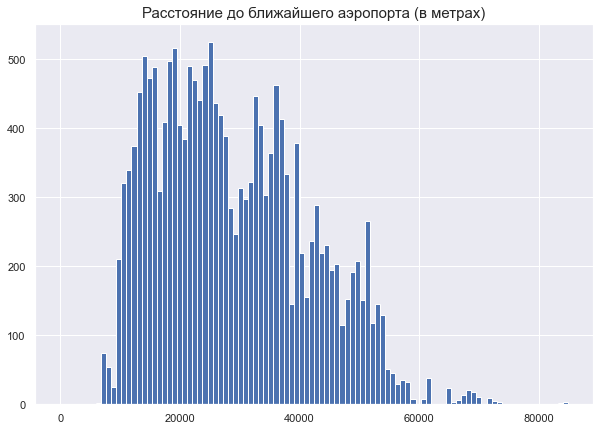

In [47]:
data.hist('airports_nearest', bins=100)
plt.title('Расстояние до ближайшего аэропорта (в метрах)', fontsize = 15);

# сразу посмотрим количество пропусков
data['airports_nearest'].isna().sum()

Всё в пределах нормы. Удалять данные никакие не будем и пропуски так же не стоить трогать. Эти данные автоматические, подгружались системой. Скорее всего именно этим обусловлено наличие такого количества отсутствующих значений. В таблице представлены разные населённые пункты, но больше половины это Санкт-Петербург и Мурино. Город очень большой, и значения медианы нам не помогут. Так же много посёлков, где представлены не более одной квартиры и с отсутствующим расстоянием. Поэтому будем работать с тем, что есть. Будем смотреть `city_centers_nearest` (расстояние до центра города (м)).

5439

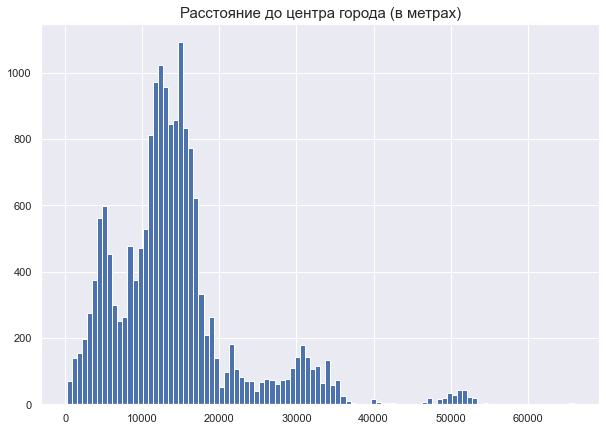

In [48]:
data.hist('city_centers_nearest', bins=100)
plt.title('Расстояние до центра города (в метрах)', fontsize = 15);

# сразу посмотрим количество пропусков
data['city_centers_nearest'].isna().sum()

Расстояние до центра так же очень разнообразное. И так же мы не будем ничего править так как данные автоматичесике. Смотрим `parks_around_3000` (число парков в радиусе 3 км).

5438

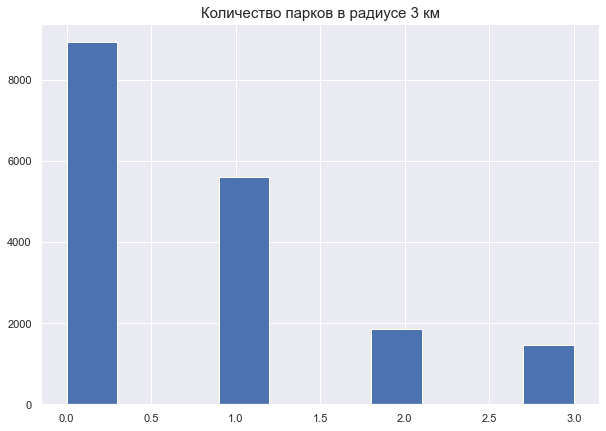

In [49]:
data.hist('ponds_around_3000', bins=10)
plt.title('Количество парков в радиусе 3 км', fontsize = 15);

data['ponds_around_3000'].isna().sum()

In [50]:
data.groupby('ponds_around_3000')['ponds_around_3000'].count()

ponds_around_3000
0.0    8929
1.0    5591
2.0    1856
3.0    1457
Name: ponds_around_3000, dtype: int64

Все данные целочисленные, поэтому мы поменяем тип столбца. Так же есть пропуски `5447 штук`. Заполнять мы их не будем потому как и выше было написано, что в основном это Санкт-Петербург и Мурино и данные автоматичесике. Далее `parks_nearest` (расстояние до ближайшего парка (м))

15370

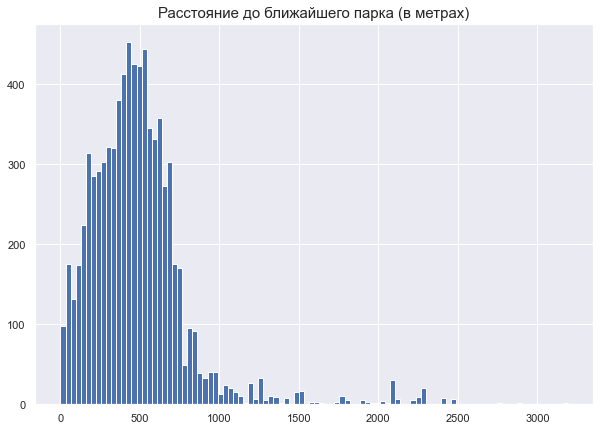

In [51]:
data.hist('parks_nearest', bins=100)
plt.title('Расстояние до ближайшего парка (в метрах)', fontsize = 15);

data['parks_nearest'].isna().sum()

Очень мало значений, относительно стоблца `ponds_around_3000`. То есть данные сколько вокруг водоёмов есть, а сколько до близжайшего в разы меньше. Восстановить мы их не сможем самостоятельно. Смотрим `ponds_around_3000` (число водоёмов в радиусе 3 км) и `ponds_nearest` (расстояние до ближайшего водоёма (м)).

5438

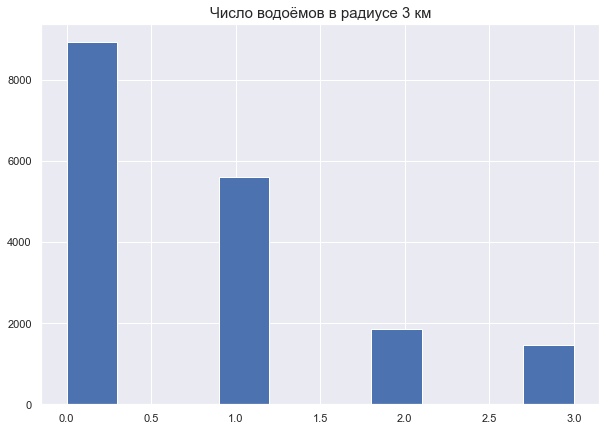

In [52]:
data.hist('ponds_around_3000', bins=10)
plt.title('Число водоёмов в радиусе 3 км', fontsize = 15);

data['ponds_around_3000'].isna().sum()

14367

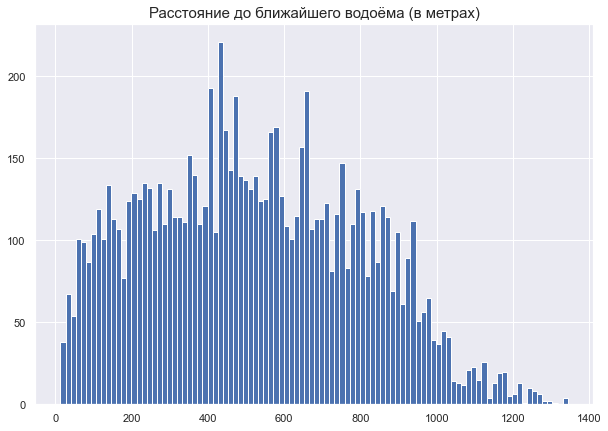

In [53]:
data.hist('ponds_nearest', bins=100)
plt.title('Расстояние до ближайшего водоёма (в метрах)', fontsize = 15); 

data['ponds_nearest'].isna().sum()

Ситуация с этими двумя столбцами в точности такая же как с двумя предыдущими. Поэтому переходим к завершающему `days_exposition` (сколько дней было размещено объявление (от публикации до снятия)).

3147

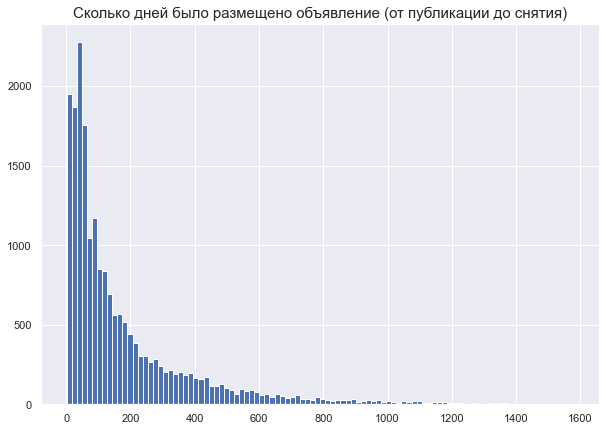

In [54]:
data.hist('days_exposition', bins=100)
plt.title('Сколько дней было размещено объявление (от публикации до снятия)', fontsize = 15); 

data['days_exposition'].isna().sum()

Эти данные мы возьмём все. Мы видим, что есть пропущенные значения. Скорее всего это активные объявления. Квартиры ещё не проданы. Мы сменим тип этого столбца, так как в нём должны быть только целочисленные значения, которые обозначают количество дней. Для этого заменим пустые занчения на `0`.

In [55]:
data.loc[(data['days_exposition'].isna()), 'days_exposition'] = 0

data['days_exposition'] = data['days_exposition'].astype('int')
data.dtypes['days_exposition']

dtype('int32')

***Вывод:*** В ходе этапа предобработки данных мы:
- привели к общему виду названия столбцов;
- в столбце `total_images` мы ублали аномальные значение, а в объявлениях, где было загружено `20 фото`, сократили это значение вдвое. Возможно кто-то очень любит свою квартиру и готов к более подробной съёмке, но скорее всего были загружены дубликаты;
- исключили `8793 строку` из таблицы. В столбце `last_price` указана очень маленькая стоимость, является аномалией. Так же аномалии убрали в столбцах `ceiling_height, floors_total, living_area, kitchen_area`;
- в столбце `ceiling_height` заполнили пустые значения медианным по столбцу;
- а в столбце `floors_total` заполнить пустые значения нет возможности и нам пришлось удалить `86 сток` из таблицы, чтобы они не вносили дополнитльеных искажений при обучении модели;
- решили пробулему наличия кухонь и комнат в квартирах-студиях. А именно установили размер кухни `0` и количетво комнат `0`. Затронуло `143 строки`;
- в столбце `living_area` заполнили пустые значения. Для этого сгруппировали квартиры по количеству комнат и нашли для каждой группы медианное значение. Ими и заполним пропуски;
- а вот в столбце `kitchen_area` заполнили пропуски медианой, но для этого уже группировали по количеву комнат;
- в столбце с балконам (`balcony`) заполнили пустые значение 0. Предпологая, что просто не отметили отсутсвие балкона в квартире;
- убрали неявные дубликаты в `locality_name`. Удалось убрать из таблицы `34 неявных дубликата`;
- в стобцах, которые были автоматиччески заполнены (`airports_nearest, city_centers_nearest, parks_around_3000, parks_nearest, ponds_around_3000, ponds_nearest, days_exposition`) мы ничего не меняли. В них много пропусков, поэтому рекоментуем перед началом обучения модели, чтобы отсутствующие данные дополнили ответственные за инженерную составляющую системы;
- в столбцах `last_price, first_day_exposition, floors_total, is_apartment, balcony, days_exposition` сменили тип данных. Поменяли на более соответствующий.

## Добавление новых столбцов в таблицу

Для начала исследования добавим в таблицу несколько новых столбцов. Первый из ни это цена одного квадратного метра жилья. Дадим обозначение `price_square`.

In [56]:
data['price_square'] = data['last_price'] / data['total_area']
data['price_square']

0        120370.370370
1         82920.792079
2         92785.714286
3        408176.100629
4        100000.000000
             ...      
23694     72490.845228
23695     52542.372881
23696     44091.710758
23697    149511.400651
23698     41795.665635
Name: price_square, Length: 23271, dtype: float64

Добавим в столбец `day_publication` день публикации объевления, где `0` - понедельник, `1` - вторник и т.д.



In [57]:
data['day_publication'] = pd.DatetimeIndex(data['first_day_exposition']).weekday 
data['day_publication']

0        3
1        1
2        3
3        4
4        1
        ..
23694    1
23695    0
23696    6
23697    1
23698    4
Name: day_publication, Length: 23271, dtype: int64

По такому же принципу добавим месяц публикации в `month_publication`.

In [58]:
data['month_publication'] = pd.DatetimeIndex(data['first_day_exposition']).month 
data['month_publication']

0         3
1        12
2         8
3         7
4         6
         ..
23694     3
23695     1
23696     2
23697     3
23698     7
Name: month_publication, Length: 23271, dtype: int64

B добавим год публикации в `year_publication`.

In [59]:
data['year_publication'] = pd.DatetimeIndex(data['first_day_exposition']).year 
data['year_publication']

0        2019
1        2018
2        2015
3        2015
4        2018
         ... 
23694    2017
23695    2018
23696    2018
23697    2017
23698    2017
Name: year_publication, Length: 23271, dtype: int64

Теперь типизируем этажи в столбец `floors_total`. Будем использовать `3` типа («первый», «последний», «другой»).

In [60]:
data.loc[(data['floors_total'] == data['floor']) & (data['floor'] != 1), 'type_floor'] = 'последний'
data.loc[(data['floors_total'] != data['floor']), 'type_floor'] = 'другой'
data.loc[data['floor'] == 1, 'type_floor'] = 'первый'

# проверка
data.query('type_floor == "первый"').head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_square,day_publication,month_publication,year_publication,type_floor
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.6,1,True,False,False,11.0,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81,82920.792079,1,12,2018,первый
14,1,4400000,36.0,2016-06-23,1,2.65,6,17.0,1,True,False,False,8.0,0,Пушкин,20782.0,30759.0,0.0,NaN,1.0,96.0,203,122222.222222,3,6,2016,первый
16,11,6700000,82.0,2017-11-23,3,3.05,5,55.6,1,True,False,False,9.0,0,Санкт-Петербург,22108.0,10698.0,3.0,420.0,0.0,NaN,397,81707.317073,3,11,2017,первый
24,8,6500000,97.2,2015-10-31,2,2.65,3,46.5,1,True,False,False,19.6,0,Санкт-Петербург,20052.0,2336.0,3.0,411.0,3.0,124.0,265,66872.427984,5,10,2015,первый
28,8,4170000,44.0,2017-12-13,1,2.90,6,20.8,1,True,False,False,11.7,1,Пушкин,18557.0,30710.0,0.0,NaN,1.0,118.0,74,94772.727273,2,12,2017,первый
37,10,1990000,45.8,2017-10-28,2,2.50,5,30.5,1,True,False,False,8.7,0,посёлок городского типа Красный Бор,NaN,NaN,NaN,NaN,NaN,NaN,196,43449.781659,5,10,2017,первый
68,11,4150000,74.0,2017-08-04,3,2.80,5,44.0,1,True,False,False,8.0,2,деревня Фёдоровское,NaN,NaN,NaN,NaN,NaN,NaN,234,56081.081081,4,8,2017,первый
70,9,3400000,30.0,2018-09-05,1,2.65,5,16.0,1,True,False,False,7.0,0,Санкт-Петербург,39053.0,8313.0,1.0,382.0,0.0,NaN,14,113333.333333,2,9,2018,первый
73,10,4750000,73.8,2016-03-14,3,2.65,10,44.8,1,False,False,False,10.4,0,посёлок Парголово,53817.0,23742.0,0.0,NaN,3.0,631.0,166,64363.143631,0,3,2016,первый
76,12,2800000,55.1,2016-05-14,3,2.60,5,38.4,1,True,False,False,4.9,0,Кировск,NaN,NaN,NaN,NaN,NaN,NaN,606,50816.696915,5,5,2016,первый


И так же сделаем рассчёт столбца `city_centers_nearest_km`. Это будет расстояние до цента в килломертах.


In [61]:
data['city_centers_nearest_km'] = (data['city_centers_nearest'] / 1000).round(0)

# и раз мы получили округлённое значение, то сменим тип столбца на целочисленный
data['city_centers_nearest_km'] = data['city_centers_nearest_km'].astype('Int64')

data['city_centers_nearest_km']

0          16
1          19
2          14
3           7
4           8
         ... 
23694       4
23695    <NA>
23696    <NA>
23697      10
23698    <NA>
Name: city_centers_nearest_km, Length: 23271, dtype: Int64

***Вывод:*** Для проведения рассчётов и построения графиков для исследования мы создали несколько новых столбцов. Мы выделили тип этажа (первый, последний или другой), в несколько других столбцов распарсили дату подачи объявления по дню, месяцу и году. Рассчитали стоимость квадрата для каждой квартиры и перевели значения расстояния до ценрта в киллометры. Все эти данные мы используем для дальнейшего анализа.

## Исследование данных

**Отлично! Теперь посмотрим на основные параметры продаваемого жилья.**

***Площадь квартир***

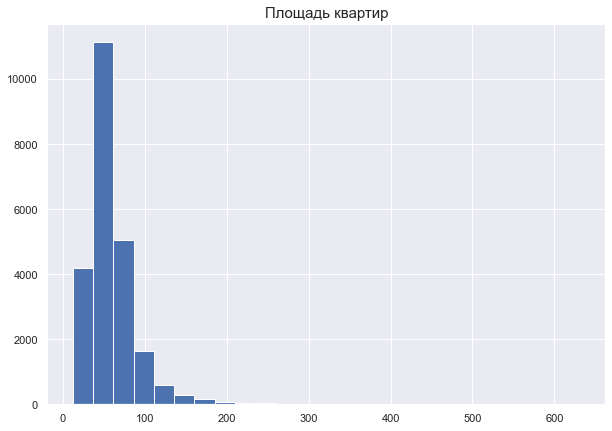

In [62]:
data.hist('total_area', bins=25);
plt.title('Площадь квартир', fontsize = 15);

Это у нас общая площадь. По графику видим, что в большая часть квартир, это жильё до `100 квадратных метров` с пиковы значение в районе `50`. Есть квартиры попросторнее, но их количестов в разы меньше.

***Жилая площадь квартир***

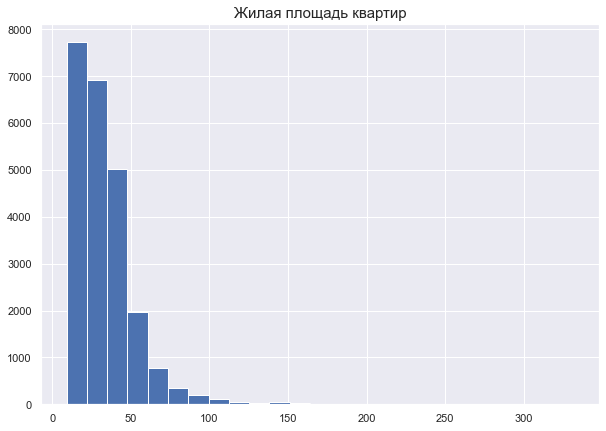

In [63]:
data.hist('living_area', bins=25);
plt.title('Жилая площадь квартир', fontsize = 15);

Это жилая площадь. Основная масса квартир имеют до `50 квадратов жилой площади`. Можно наблюдать пики на `20` и `30` квадратных метров.

***Площадь кухни***

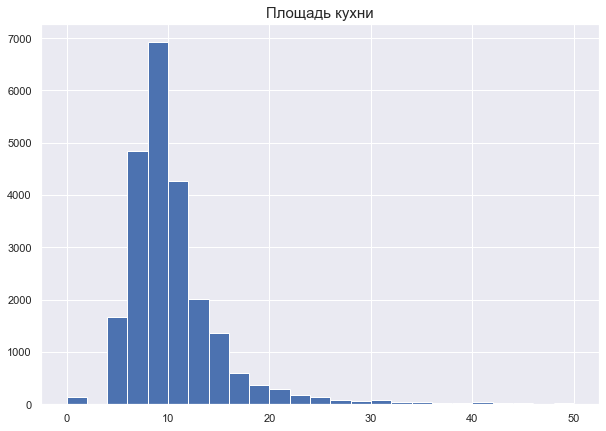

In [64]:
data.hist('kitchen_area', bins=25);
plt.title('Площадь кухни', fontsize = 15);

Площадь кухни в основном это от `7` до `12` квадратов. Есть значение у нуля. Это `146 квартир-студий` у которых нет кухни.  

***Стоимость квартир***

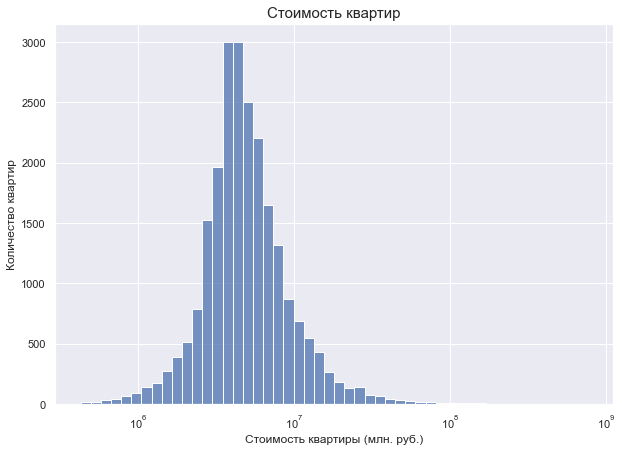

In [65]:
sns.histplot(data=data, x='last_price', bins=50, log_scale=True)
plt.title('Стоимость квартир', fontsize=15)
plt.xlabel('Стоимость квартиры (млн. руб.)')
plt.ylabel('Количество квартир')
plt.grid(True)
plt.show()

Цены на жильё очень разные. Есть в таблице и супер дорогие. Но в основном стоимость до `10 милионов рублей`.

***Количество комнат***

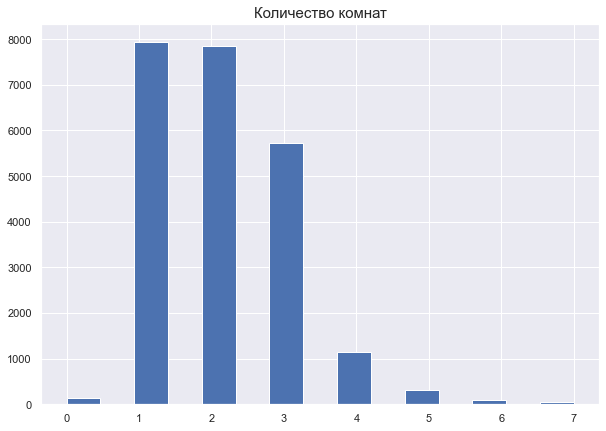

In [66]:
data.hist('rooms', bins=15);
plt.title('Количество комнат', fontsize = 15);

По количеству комнат, в лидерах с `1 и 2 комнатами`. Практически одинаковые показатели. Немного меньше в таблице представлено `3 комнатных квартир`.  И есть вкрапления, это квартиры-студий и `5-6-7 комнатные`.

***Высота потолков***

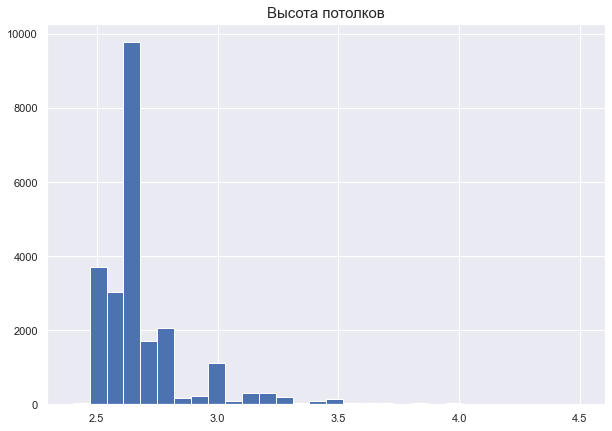

In [67]:
data.hist('ceiling_height', bins=30);
plt.title('Высота потолков', fontsize = 15);

Высота квартир. Тут показатель стремится к `2,5 метрам`. Более `3500 объектов`. И `до 3 метров` довольно часто можно встретить. Всё что выше, это можно назвать экзотикой.

***Этаж квартиры***

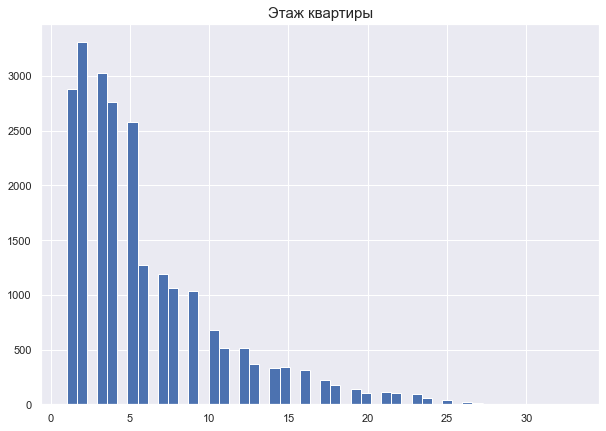

In [68]:
data.hist('floor', bins=50);
plt.title('Этаж квартиры', fontsize = 15);

В основном в таблице квартиры расположенные `от 1 до 5 этажа (включительно)`. И это не удивительно. Так как в массиве данных у нас и боьше всего `5-этажных домов`.

***Типы этажей***

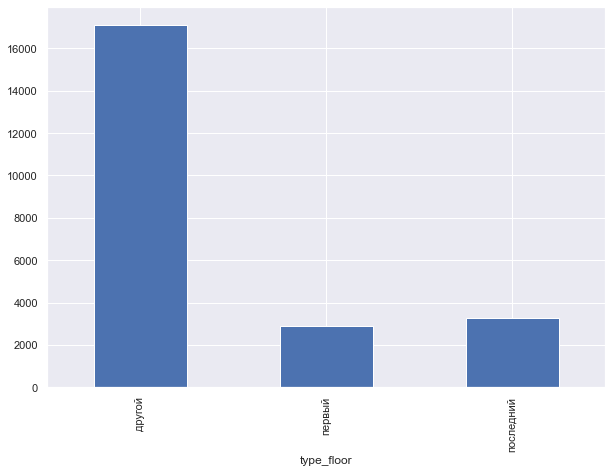

In [69]:
data.groupby('type_floor')['type_floor'].count().plot(kind='bar');

Квартир на первом и последнем этаже не очень много и разница между ними не велика. А вот квартир другого типа в разы больше.

***Этажность дома***

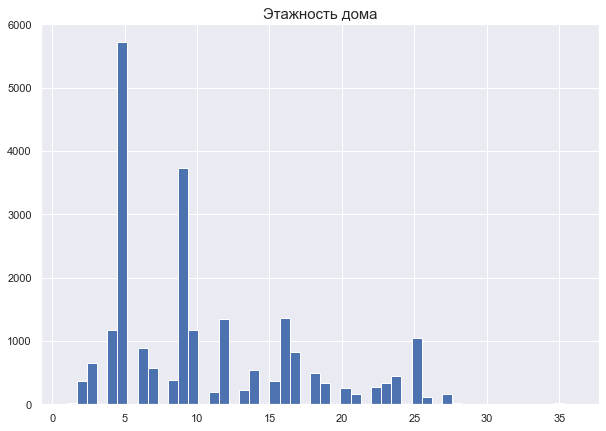

In [70]:
data.hist('floors_total', bins=50);
plt.title('Этажность дома', fontsize = 15);

В основном фигурируют `5-этажные` дома. На втором месте это `9 этажей`.

***Расстояния до цента***

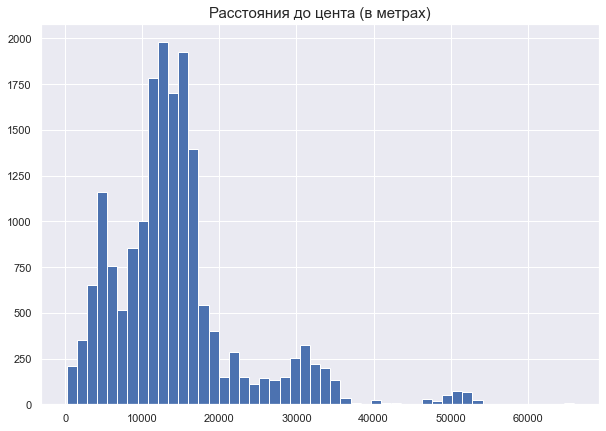

In [71]:
data.hist('city_centers_nearest', bins=50);
plt.title('Расстояния до цента (в метрах)', fontsize = 15);

Из тех данных, что есть в таблице в основном это `17000 метров от центра города`. Есть значительный всплеск квартир расположенных примерно в `5 километрах`. Есть и далее жилью. Более `50 киллометров от центра`.

***Расстояние до ближайшего аэропорта***

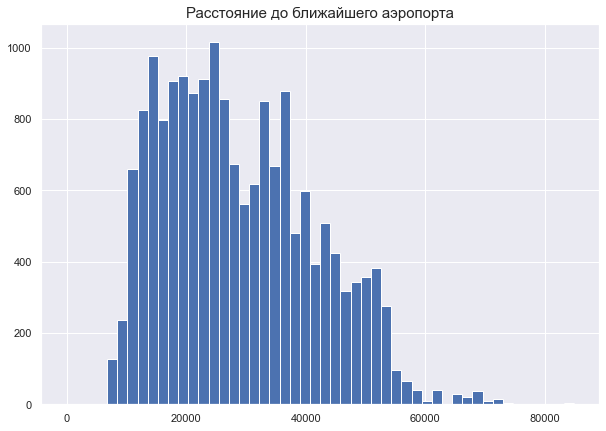

In [72]:
data.hist('airports_nearest', bins=50);
plt.title('Расстояние до ближайшего аэропорта', fontsize = 15);

Пиковые значение приходятся на `10 - 30 киллометров`. И совсем мало значений после `60 киллометров`.

***Расстояние до ближайшего парка***

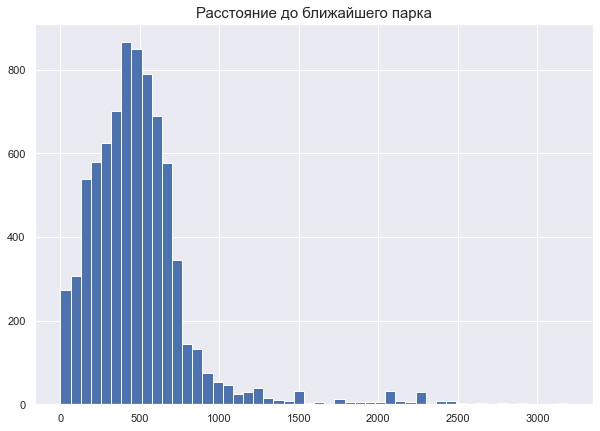

In [73]:
data.hist('parks_nearest', bins=50);
plt.title('Расстояние до ближайшего парка', fontsize = 15);

Тут всё очень неплохо. Из тех данных, что есть в таблице, у квартир, где указано расстояние они находятся `не дальше 750 метров`. С пиков `500`. И уж совсем не много жилья, у которого до парка больше `1 киллометра`.

***Дни публикации***

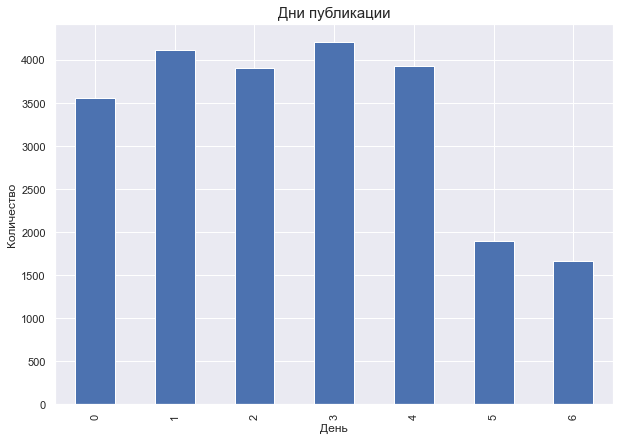

In [74]:
data.groupby('day_publication')['day_publication'].count().plot(kind='bar');
plt.title('Дни публикации', fontsize = 15);
plt.xlabel('День');
plt.ylabel('Количество');

По графику видно, что люди публиковались в будние дни в `2 раза чаще`, чем в выходные.

***Месяц публикации***

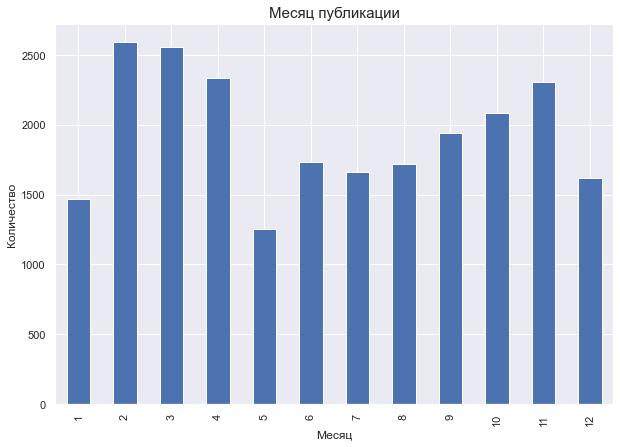

In [75]:
data.groupby('month_publication')['month_publication'].count().plot(kind='bar');
plt.title('Месяц публикации', fontsize = 15);
plt.xlabel('Месяц');
plt.ylabel('Количество'); 

А вот продавать жильё люди предпочитают `в феврале и марте`. Неного от этих значений отсаёт `декабрь и апрель`. Самая слабая активность `в мае`.

***Время продажи квартиры***

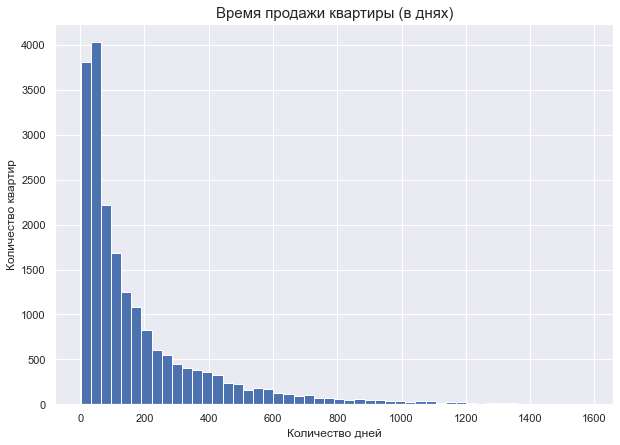

In [76]:
data.loc[(data['days_exposition'] != 0)]['days_exposition'].hist(bins=50);
plt.title('Время продажи квартиры (в днях)', fontsize = 15);
plt.xlabel('Количество дней');
plt.ylabel('Количество квартир'); 

А теперь посмотрим как быстро продавались квартиры. Мы не будем брать в рассчет те квартиры, которые ещё продаются. Мы для них поставили в таблице значение `0`. Итого. Большенство квартир продаётся быстрее чем за `200 дней`. Но есть и `необычно долгие`. Наверное к ним можно отнести всё, что более `600 дней`. Это больше года на минуточку! Рассмотрим ближе.

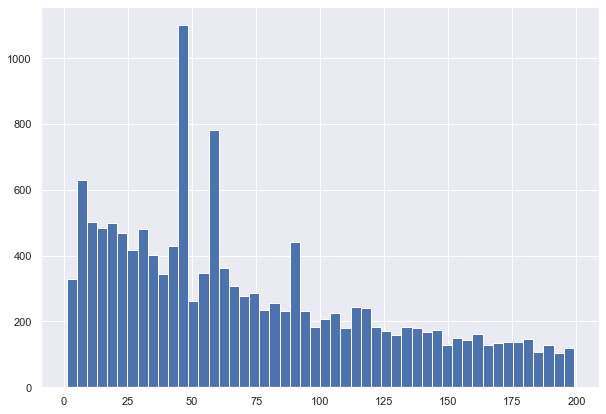

In [77]:
data.loc[(data['days_exposition'] != 0) & (data['days_exposition'] < 200)]['days_exposition'].hist(bins=50);

`50 дней` и квартира проданана. Более `1000` счастливчиков в таблице. Но в целом активно раскупают квартиры в районе до `90 дней`. Видим явный всплеск на `45 дней` продажи. Это, судя по правилам площадки (https://yandex.ru/support/realty/owner/home/add-ads-housing.html) истёк срок публикации объявления, и плю сте, которые действительно продали. Посчитаем среднее и медиану столбца.

In [78]:
print('Среднее значение при продаже квартиры:', data.loc[(data['days_exposition'] != 0)]['days_exposition'].mean())
print('Медианное значение при продаже квартиры:', data.loc[(data['days_exposition'] != 0)]['days_exposition'].median())

Среднее значение при продаже квартиры: 181.05351818723912
Медианное значение при продаже квартиры: 96.0


Ну, а теперь посмотрим какие факторы больше всего влияют на общую (полную) стоимость объекта?

Посмотрим отношение цены и общей площади.

***Отношение цены и общей площади***

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


0.6233504888246004

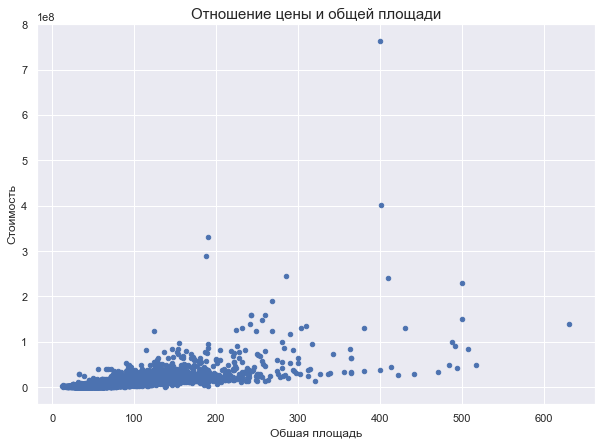

In [79]:
data.plot(x = 'total_area', y = 'last_price',  kind='scatter', grid = True)
plt.title('Отношение цены и общей площади', fontsize = 15);
plt.xlabel('Обшая площадь');
plt.ylabel('Стоимость'); 

data['last_price'].corr(data['total_area'])

***Отношение цены и жилой площади***

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


0.5316302969114696

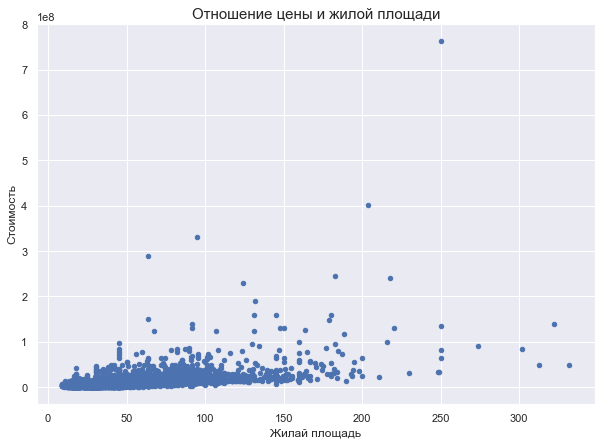

In [80]:
data.plot(x = 'living_area', y = 'last_price',  kind='scatter', grid = True)
plt.title('Отношение цены и жилой площади', fontsize = 15);
plt.xlabel('Жилай площадь');
plt.ylabel('Стоимость'); 

data['last_price'].corr(data['living_area'])

***Отношение цены и площади кухни***

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


0.3962408530964057

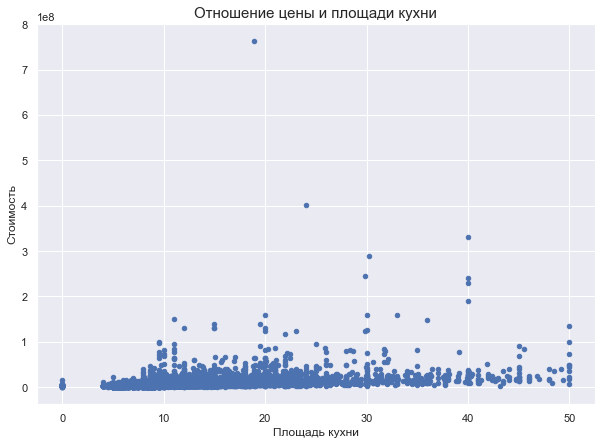

In [81]:
data.plot(x = 'kitchen_area', y = 'last_price',  kind='scatter', grid = True)
plt.title('Отношение цены и площади кухни', fontsize = 15);
plt.xlabel('Площадь кухни');
plt.ylabel('Стоимость'); 

data['last_price'].corr(data['kitchen_area'])

***Отношение цены и количество комнат***

0.3450888471523513

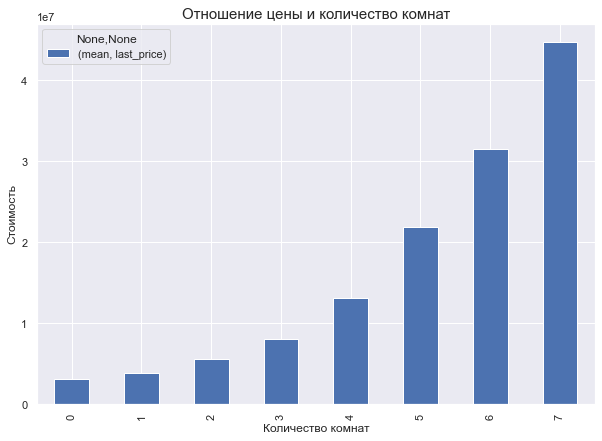

In [82]:
data.pivot_table(index='rooms', values='last_price', aggfunc=['mean']).plot(kind='bar', grid=True); 
plt.title('Отношение цены и количество комнат', fontsize = 15);
plt.xlabel('Количество комнат');
plt.ylabel('Стоимость'); 

data['last_price'].corr(data['rooms'])

***Отношение цены и типа этажа, на котором расположена квартира (первый, последний, другой)***

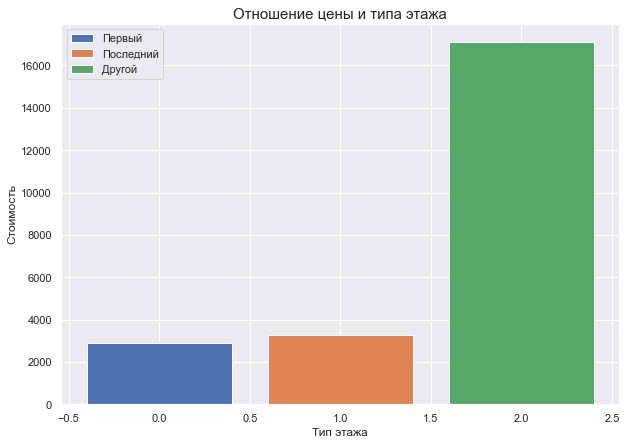

In [83]:
# преобразуем тип этажа в числовой формат
data.loc[data['type_floor'] == 'первый', 'type_floor_enum'] = 0
data.loc[data['type_floor'] == 'последний', 'type_floor_enum'] = 1
data.loc[data['type_floor'] == 'другой', 'type_floor_enum'] = 2

# создаем сводную таблицу
pivot = data.pivot_table(index='type_floor_enum', values='last_price', aggfunc=['count'])

# строим график
x = pivot.index
y = pivot[('count', 'last_price')]
fig, ax = plt.subplots()
ax.bar(x[0], y[0], label='Первый')
ax.bar(x[1], y[1], label='Последний')
ax.bar(x[2], y[2], label='Другой')

# подписываем оси и график
plt.title('Отношение цены и типа этажа', fontsize=15)
plt.xlabel('Тип этажа')
plt.ylabel('Стоимость')
plt.legend()

# отображаем график
plt.show()

***Отношение цены и даты размещения (день недели, месяц, год)***

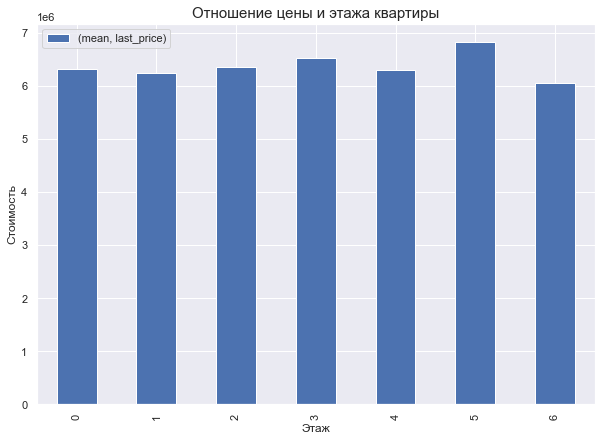

In [84]:
data.pivot_table(index='day_publication', values='last_price', aggfunc=['mean']).plot(kind='bar', grid=True); 
plt.title('Отношение цены и этажа квартиры', fontsize=15);
plt.xlabel('Этаж');
plt.ylabel('Стоимость');
plt.legend();

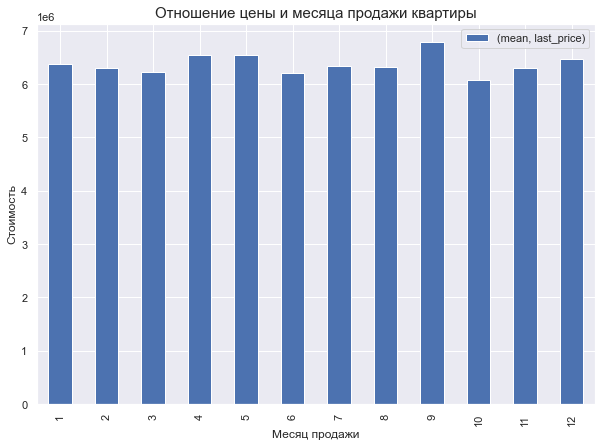

In [85]:
data.pivot_table(index='month_publication', values='last_price', aggfunc=['mean']).plot(kind='bar', grid=True); 
plt.title('Отношение цены и месяца продажи квартиры', fontsize=15);
plt.xlabel('Месяц продажи');
plt.ylabel('Стоимость');
plt.legend();

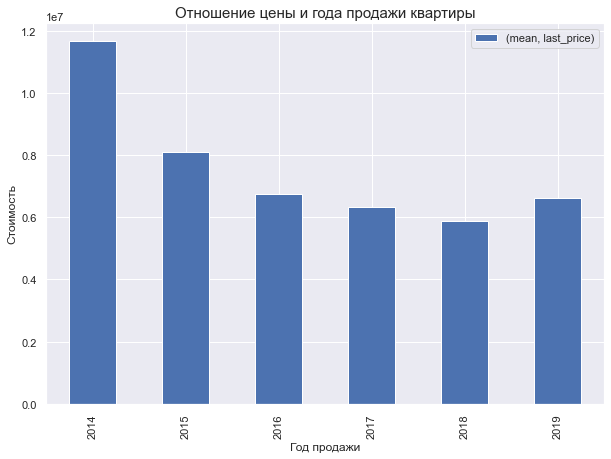

In [86]:
data.pivot_table(index='year_publication', values='last_price', aggfunc=['mean']).plot(kind='bar', grid=True);
plt.title('Отношение цены и года продажи квартиры', fontsize=15);
plt.xlabel('Год продажи');
plt.ylabel('Стоимость');
plt.legend();

Глядя на постоенные нами графики и коэффициент корреляции различных параметров жилья относительно стоимости мы выявили, что очень `сильно на цену влияет общая площадь жилья` с коэффициентом в `0.62` (по методу корреляции Пирона). Но визуально мы так же можем наблюдать большой всплеск в 2014 году, когда на продажу было выставлено большое количество дорогоих квартир. Возможно это случилось на фоне кризиса `2014 года`.

Теперь проверим среднюю цену одного квадратного метра в `10 населённых пунктах` с наибольшим числом объявлений.

In [87]:
x_srez = data['locality_name'].value_counts().head(10)
square_meter = []

for value in x_srez.index:
    b = data.loc[data['locality_name'] == value]
    square_mean= int((b['last_price'] / b['total_area']).mean())
    square_meter.append(f'Средняя стоимсть метра в {value} равна {square_mean}')
    
square_meter

['Средняя стоимсть метра в Санкт-Петербург равна 114172',
 'Средняя стоимсть метра в посёлок Мурино равна 85344',
 'Средняя стоимсть метра в посёлок Шушары равна 78577',
 'Средняя стоимсть метра в Всеволожск равна 68752',
 'Средняя стоимсть метра в Пушкин равна 102720',
 'Средняя стоимсть метра в Колпино равна 75333',
 'Средняя стоимсть метра в посёлок Парголово равна 90227',
 'Средняя стоимсть метра в Гатчина равна 68752',
 'Средняя стоимсть метра в деревня Кудрово равна 92104',
 'Средняя стоимсть метра в Выборг равна 58238']

Как итог: в Санкт-Петербурге стоимость квадрата самая высокая. Это `114144 рублей`. А вот самый низкой показатель имеет Выборг и `58238 рублей` за квадрат соответственно.

И в конце исследования мы посмотрим среднюю цену каждого километра от центра до жилья по Санкт-Петербургу.

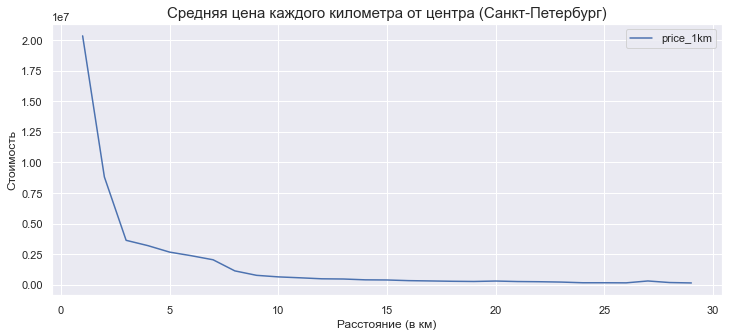

In [88]:
y_srez = data[data['locality_name'] == 'Санкт-Петербург']

data['price_1km'] = y_srez['last_price'] / y_srez['city_centers_nearest_km']

data.query('locality_name == "Санкт-Петербург"')\
    .pivot_table(index='city_centers_nearest_km', values='price_1km')\
    .plot(grid=True, figsize=(12, 5)); 

plt.title('Cредняя цена каждого километра от центра (Санкт-Петербург)', fontsize=15);
plt.xlabel('Расстояние (в км)');
plt.ylabel('Стоимость');
plt.legend();

В районе `7 км до центра` цены начиняют расти и это очень заметно по графику. И уже на расстоянии `1км` цена устремляется "в небеса". Очень заментый и резкий взлёт вверх, который в разы больше чем у квартир расположенные `2-4км от центра`.

***Вывод:*** Мы изучили и описали большинство параметров объявления, корреляции. В итоговом выводе всё подробно распишем.

## Общий вывод

В ходе нашего исследования мы выполнили поставленные перед нами задачи в 4 этапа. Вот, что мы сделали и к камим выводам пришли.

В этапе ***знакомство с данными*** при загрузке данных перед нами предстало `22` столбца c различными параметрами квартир. Из описания к данным и свойства таблицы мы сразу выявили некоторые несоответствия, такие как типы некоторых столбцов. Мы поменяли их тип в стадии предобработки данных. Так же привели  название некоторых столбцов к общему виду. 

Самое неприятное, что в таблице есть много разных пропусков. Больше всего выделяются данные, которые были получены автоматически на основе картографических данных. Возможно это проблема при выгрузке. По возможности нужно поговорить со специалистом, который занимался этой задачей, чтобы до этапа обучения модели он дополнил недостающий материал.

Что касается аналитики по графикам, мы сразу заметили, что есть аномальные значения по столбцу `days_exposition, rooms и balcony`. В целом по проекту рассмотрели каждый столбец отдельно.

***В ходе этапа предобработки данных мы:***
- привели к общему виду названия столбцов;
- в столбце `total_images` мы ублали аномальные значение, а в объявлениях, где было загружено `20 фото`, сократили это значение вдвое. Возможно кто-то очень любит свою квартиру и готов к более подробной съёмке, но скорее всего были загружены дубликаты;
- исключили `8793 строку` из таблицы. В столбце `last_price` указана очень маленькая стоимость, является аномалией. Так же аномалии убрали в столбцах `ceiling_height, floors_total, living_area, kitchen_area`;
- в столбце `ceiling_height` заполнили пустые значения медианным по столбцу;
- а в столбце `floors_total` заполнить пустые значения нет возможности и нам пришлось удалить `86 сток` из таблицы, чтобы они не вносили дополнитльеных искажений при обучении модели;
- решили пробулему наличия кухонь и комнат в квартирах-студиях. А именно установили размер кухни `0` и количетво комнат `0`. Затронуло `143 строки`;
- в столбце `living_area` заполнили пустые значения. Для этого сгруппировали квартиры по количеству комнат и нашли для каждой группы медианное значение. Ими и заполним пропуски;
- а вот в столбце `kitchen_area` заполнили пропуски медианой, но для этого уже группировали по количеву комнат;
- в столбце с балконам (`balcony`) заполнили пустые значение 0. Предпологая, что просто не отметили отсутсвие балкона в квартире;
- убрали неявные дубликаты в `locality_name`. Удалось убрать из таблицы `34 неявных дубликата`;
- в стобцах, которые были автоматиччески заполнены (`airports_nearest, city_centers_nearest, parks_around_3000, parks_nearest, ponds_around_3000, ponds_nearest, days_exposition`) мы ничего не меняли. В них много пропусков, поэтому ещё раз рекомендуем перед началом обучения модели, чтобы отсутствующие данные дополнили ответственные за инженерную составляющую системы;
- в столбцах `last_price, first_day_exposition, floors_total, is_apartment, balcony, days_exposition` сменили тип данных. Поменяли на более соответствующий.

В этапе ***добавление новых столбцов в таблицу*** для проведения рассчётов и построения графиков для исследования мы создали несколько новых столбцов. Мы выделили тип этажа (первый, последний или другой), в несколько других столбцов распарсили дату подачи объявления по дню, месяцу и году. Рассчитали стоимость квадрата для каждой квартиры и перевели значения расстояния до ценрта в киллометры. Все эти данные мы используем для дальнейшего анализа.

При исследовании данных мы изучили и описали большинство параметров объявления, корреляции. Что мы выявили:
- большая часть квартир, это жильё `до 100 квадратных метров` с пиковы значение в районе `50`. Есть квартиры попросторнее, но их количестов в разы меньше;
- сновная масса квартир имеют `до 50 квадратов жилой площади`;
- площадь кухни в основном это `от 7 до 12 квадратов`. Есть значение у нуля. Это `146 квартир-студий` у которых нет кухни;
- цены на жильё очень разные. Есть в таблице и супер дорогие. Но в основном стоимость `до 10 милионов рублей`;
- по количеству комнат, в лидерах жильё с `1 и 2 комнатами`. Практически одинаковое количество. Немного меньше в таблице представлено `3 комнатных квартир`.  И есть вкрапления, это квартиры-студий и `5-6-7 комнатные`;
- что касается высоты потолков, то тут частое значение = `2,5 метра`. Более `3500 объектов`. И `до 3 метров` так же можно встретить довольно часто. Всё что выше, это можно назвать экзотикой;
- в основном в таблице квартиры расположенные `от 1 до 5 этажа (включительно)`. И это не удивительно. Так как в массиве данных у нас и боьше всего `5-этажных домов`. На втором месте это дома у которых `9 этажей`;
- квартир на первом и последнем этаже не очень много и разница между ними не велика. А вот квартир другого типа в разы больше;
- из тех данных, что есть в таблице в основном квартиры расположены `17 000 метров от центра города`. Есть значительный массив квартир расположенных примерно `в 5 километрах`. Есть и дальше - `более 50 киллометров от центра`;
- до аэропорта обычно `10 - 30 киллометров` и совсем мало квартир имеют отдалённость `более 60 киллометров`;
- с парками всё очень неплохо. Из тех данных, что есть в таблице, у квартир, где указано расстояние они находятся `не дальше 750 метров`. С пиком `500`. И уж совсем не много жилья, у которого до парка `больше 1 киллометра`;
- так же мы выяснили, что люди публиковались в будние дни `в 2 раза чаще`, чем в выходные, а вот продавать жильё люди предпочитают `в феврале и марте`. Немного от этих значений отстаёт `декабрь и апрель`. Самая слабая активность `в мае`;
- большенство квартир продаётся `быстрее чем за 200 дней`. Но есть и `необычно долгие`. Наверное к ним можно отнести всё, что `более 600 дней`. Это больше года на минуточку! ;
- `50 дней` и квартира проданана - это `более 1000` счастливчиков в таблице. Но в целом активно раскупают квартиры в районе `до 90 дней`. Увидели явный всплеск на `45 дней` продажи. Это, судя по правилам площадки (https://yandex.ru/support/realty/owner/home/add-ads-housing.html) истёк срок публикации объявления и плюс люди, которые действительно продали в этот период;
- среднее значение при продаже квартиры: `181.0`;
- медианное значение при продаже квартиры: `96.0`;
- если посмотреть на постоенные нами графики и коэффициент корреляции различных параметров жилья относительно стоимости то можно заметить, что очень `сильно на цену влияет общая площадь жилья` с коэффициентом в `0.62` (по методу корреляции Пирона). И  визуально мы заметили большой всплеск в `2014 году`, когда на продажу было выставлено большое количество дорогоих квартир. Возможно это случилось на фоне кризиса `2014 года`;
- в Санкт-Петербурге стоимость квадрата самая высокая. Это `114144 рублей`. А вот самый низкой показатель имеет Выборг и `58238 рублей` за квадрат соответственноДелаем поздравление от семьи или только от Вас, как от жены?
- и ещё одно не маловажное наблюдение. В районе `7 км до центра` цены начиняют расти и это очень заметно по графику. А уже на расстоянии `1 км` цена устремляется "в небеса". Очень заментый и резкий взлёт вверх, который в разы больше чем у квартир расположенные `2-4 км от центра`.

***Ответ на вопрос поставленной задачи:*** параметры от которых зависит стоимость - в основном это общая площадь жилья и расположение квартиры (расстояние до центра).